In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [ ]:
# Label    Description
# 0        T-shirt/top
# 1        Trouser
# 2        Pullover
# 3        Dress
# 4        Coat
# 5        Sandal
# 6        Shirt
# 7        Sneaker
# 8        Bag
# 9        Ankle boot

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
y_train.shape

(60000,)

In [6]:
x_train.shape

(60000, 28, 28)

In [9]:
# librairie
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [11]:
#format : petite image 
x_train[0].shape

(28, 28)

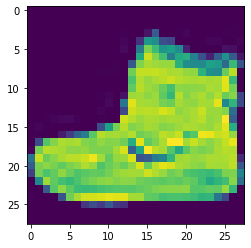

In [12]:
plt.imshow ( x_train[0] )

In [13]:
#c est un chaussure 
y_train [0]

# 9        Ankle boot

# cela a l air ok

9

In [17]:
# y doit etre onehot encoding

from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical ( y_train)
y_test_cat = to_categorical ( y_test)

In [19]:
# x doit etre normaliser 

x_train_norm = x_train / 255
x_test_norm = x_test / 255


In [38]:
x_train_norm.shape

(60000, 28, 28, 1)

In [39]:
x_test_norm.shape

(10000, 28, 28, 1)

In [30]:
x_train_norm = x_train_norm.reshape (60000, 28, 28,1)
x_test_norm = x_test_norm.reshape (10000, 28, 28,1)

In [48]:
#CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, Dense

from tensorflow.keras.callbacks import EarlyStopping


model = Sequential ()
#couches 
model.add ( Conv2D ( filters = 32 , #nombre de filtre    
                     kernel_size = (4,4),   #le noyau 
                     input_shape = (28,28,1), #taille de l input
                     activation= 'relu') )  

model.add (MaxPool2D (pool_size = (2,2) ) )  #la 1/2 du noyau 

model.add ( Conv2D ( filters = 32 , #nombre de filtre    
                     kernel_size = (4,4),   #le noyau 
                     input_shape = (28,28,1), #taille de l input
                     activation= 'relu') )  

model.add (MaxPool2D (pool_size = (2,2) ) )  #la 1/2 du noyau 

model.add ( Flatten () )  

model.add ( Dense (128 , activation = 'relu'))

model.add ( Dense (10 ,                      # il y a 10 classes
                   activation = 'softmax'))  # c est un pb de 
                                             # classification multi class

#compile
model.compile ( loss = 'categorical_crossentropy' , 
                optimizer = 'adam', 
                metrics = [ 'accuracy' ] )  #nous allons verifier les loss (pertes)
                                            # mais aussi la presicion
#callbacks
ea = EarlyStopping (    monitor='val_loss',
    patience=3,)

In [49]:
# fit

model.fit (     x=x_train_norm,
    y=y_train_cat,
#     batch_size=16,
    epochs=15,
    callbacks=[ea],
    validation_data= (x_test_norm , y_test_cat)
          )


Epoch 1/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5143 - accuracy: 0.8104 - val_loss: 0.4059 - val_accuracy: 0.8565
Epoch 2/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3376 - accuracy: 0.8768 - val_loss: 0.3395 - val_accuracy: 0.8775
Epoch 3/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2949 - accuracy: 0.8914 - val_loss: 0.3227 - val_accuracy: 0.8808
Epoch 4/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2621 - accuracy: 0.9030 - val_loss: 0.2961 - val_accuracy: 0.8929
Epoch 5/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2392 - accuracy: 0.9115 - val_loss: 0.3139 - val_accuracy: 0.8859
Epoch 6/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2208 - accuracy: 0.9170 - val_loss: 0.3283 - val_accuracy: 0.8818
Epoch 7/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2042 - accuracy: 0.9230 - val_loss: 0.2876 -

In [51]:
# courbe d apprentissage 
df = pd.DataFrame(model.history.history)
df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

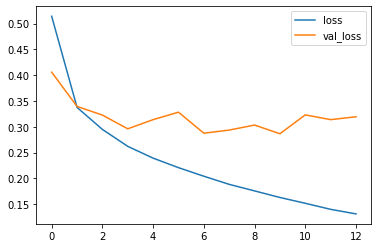

In [52]:
df[['loss', 'val_loss']].plot()

<AxesSubplot:>

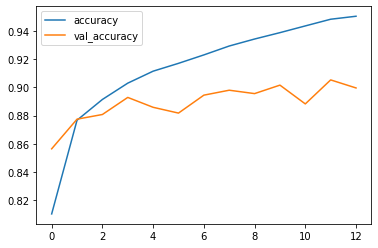

In [53]:
df[['accuracy', 'val_accuracy']].plot()

In [54]:
#evaluation
model.evaluate ( x_test_norm , y_test_cat  )

313/313 [==============================] - 2s 5ms/step - loss: 0.3194 - accuracy: 0.8996


[0.31944188475608826, 0.8996000289916992]

In [58]:
#prediction test
predict = model.predict (x_test_norm)


In [61]:
p = (predict > 0.5).astype ('int')
p

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
#matrix de confussion et classification report 
from sklearn.metrics import classification_report

print (classification_report (p ,y_test_cat ))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       930
           1       0.98      0.99      0.98       983
           2       0.87      0.83      0.85      1051
           3       0.91      0.90      0.90      1007
           4       0.74      0.89      0.81       834
           5       0.98      0.96      0.97      1023
           6       0.76      0.70      0.73      1076
           7       0.95      0.96      0.96       997
           8       0.98      0.98      0.98       999
           9       0.96      0.98      0.97       981

   micro avg       0.89      0.91      0.90      9881
   macro avg       0.89      0.91      0.90      9881
weighted avg       0.90      0.91      0.90      9881
 samples avg       0.89      0.89      0.89      9881



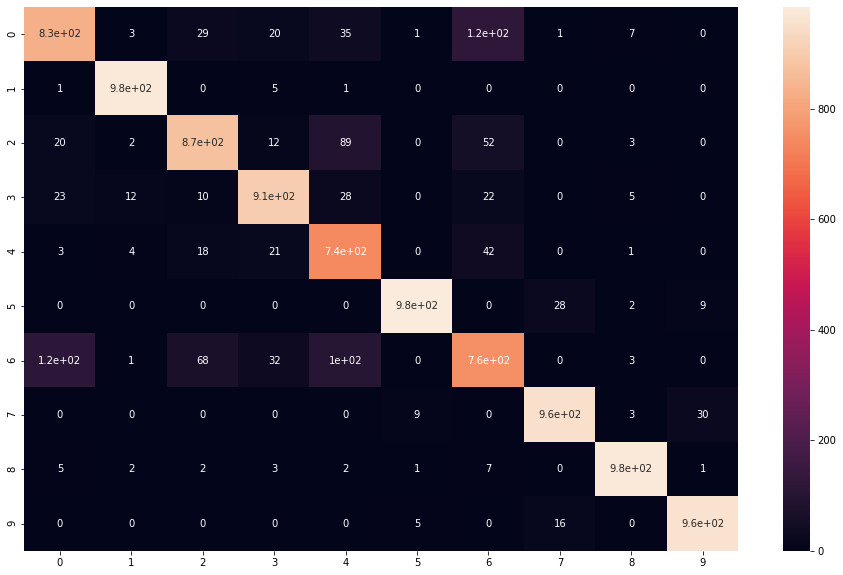

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf = confusion_matrix (p.argmax(axis=1) ,y_test_cat.argmax(axis=1))
plt.figure (figsize = (16,10))
sns.heatmap (conf , annot = True );

In [72]:
#prediction

x_test_norm[0].shape

(28, 28, 1)

In [79]:
x_test_norm.shape

(10000, 28, 28, 1)

In [87]:
#prediction sur 1 element 
x = model.predict (x_test_norm[10].reshape (1,28,28,1))

In [88]:
# prediction 
x.argmax(axis = 1)
# 4        Coat

array([4], dtype=int64)

In [86]:
#value reelle
y_test[10]

4

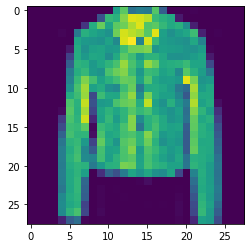

In [89]:
plt.imshow (  x_test_norm[10] , )